아래 내용은 한빛미디어사의 번역서, "Deep Learning from Scratch 밑바닥부터 시작하는 딥러닝" 책의 2장 퍼셉트론 내용입니다. 우리는 지금 길벗사의 '모두의 딥러닝' 책의 흐름데로 공부를 하고 있는데 이 책의 7장 내용이 퍼셉트론이기 때문에 다른 책의 '퍼셉트론' 파트를 참고 하고 있습니다.

# Chapter 2 퍼셉트론  
 이번 장에서는 퍼셉트론 <sup>perceptron</sup> 알고리즘을 설명합니다. 퍼셉트론은 로젠블라트가 1957년에 고안한 알고리즘입니다. 고대 화석 같은 이 알고리즘을 지금 이 시점에 왜 배우는가 하면 퍼셉트론이 신경망(딥러닝)의 기원이 되는 알고리즘이기 때문입니다. 그래서 퍼셉트론의 구조를 배우는 것은 신경망과 딥러닝으로 나아가는 데 중요한 개념을 개념이 되기 때문입니다. 

 이번 장에서는 퍼셉트론을 설명하고 퍼셉트론을 써서 간단한 문제를 풀어갑니다. 여정의 첫 목적지인 만큼 가볍고 즐거운 여행이 될 것입니다. 

##2.1 퍼셉트론이란?
 퍼셉트론은 다수의 신호를 입력 받아 하나의 신호를 출력합니다. 여기서 말하는 신호란 전류나 강물처럼 **흐름**이 있는 것을 상상하면 좋습니다. 전류가 전선을 타고 흐르는 전자를 내보내듯, 퍼셉트론 신호도 흐름을 만들고 정보를 앞으로 전달합니다. 다만, 실제 전류와 달리 페셉트론 신호는 '흐른다/안 흐른다(1이나 0)'의 두 가지 값을 가질 수 있습니다. 이 책에서는1을 '신호가 흐른다', 0을 '신호가 흐르지 않는다'라는 의미로 쓰겠습니다. 

(그림 2-1) 입력이 2개인 퍼셉트론

(그림 2-1)은 입력으로 2개의 신호를 받는 퍼셉트론의 예입니다. $x_1$과 $x_2$는 입력 신호, $y$는 출력 신호, $w_1$과 $w_2$는 가중치를 뜻합니다.($w$는 weight의 머리글자죠). 그림에서 원을 **뉴런** 혹은 **노드**라고 부릅니다. 입력신호가 뉴런에 보내질 때는 각각 고유한 **가중치**가 곱해집니다($w_1x_1,\; w_2x_2$). 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력합니다(이럴 때를 '뉴런이 활성화 되었다'라고 표현하기도 합니다). 이 책에서는 그 한계를 **임계값**이라고 하며, $\theta\;$기호<sup>theta, 센타</sup>로 나타냅니다. 
 퍼셉트론의 동작 원리는 이게 다입니다! 이 내용을 수식으로 나타내면 식(2-1)과 같습니다.  
    
(식. 2-1)
$$ y=
\begin{cases}
0 \;\;\;(w_1x_1+w_2x_2 \le \theta)\\
1 \;\;\;(w_1x_1+w_2x_2 > \theta)
\end{cases}$$  
퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여합니다. 가중치는 각 신호가 결과에 주는 영향역을 조절하는 요소로 작용합니다. 즉, 가중치가 클수록 해당 신호가 그만큼 더 중요함을 뜻합니다. 



## 2.2 단순 노리 회로
### 2.2.1 AND 게이트
 그럼 퍼셉트론을 활용한 간단한 문제를 살펴보죠. 논리 회로를 알아보는 첫걸음으로 AND 게이트를 살펴봅시다. AND 게이트는 입력이 둘이고 출력은 하나입니다. 표(2-1)과 같은 입력 신호와 출력 신호의 대응 표를 **진리표**라고 합니다. 이 그림은 AND 게이트의 진리표로 두 입력이 모두 1일 때만 1을 출력하고 그 외의 입력 상황에서는 0츨 출력합니다.  
<center>  
(표. 2-1) AND 게이트의 진리표  

|$x_1$|$x_2$|y|
|---|---|---|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|  

</center>

이 AND 게이트를 퍼셉트론으로 표현하고 싶습니다. 이를 위해 할 일은 표(2-1)의 진리표대로 작동하도록 하는 $w_1, w_2, \theta$의 값을 정하는 것입니다. 그럼 어떤 값으로 설정하면 표(2-1)과 같은 결과를 출력하는 퍼셉트론을 만들 수 있을까요?

 사실 표(2-1)를 만족하는 매개 변수 조합은 무한히 많습니다. 가령 $(w_1, w_2, \theta)$가 (0.5, 0.5, 0.7)일 때도 또 (0.5, 0.5, 0.8)이나 (1.0, 1.0, 1.0)일 때도 모두 AND 게이트의 조건을 만족합니다. 매개 변수를 이렇게 설정하면 $x_1$과 $x_2$ 모두가 1일 때문 가중 신호의 총합이 주어진 임계값($\theta$)을 웃돌게 됩니다. $(w_1, w_2, \theta)$=(0.5, 0.5, 0.7)일 때 출력($y$)의 값을 계산해 보면 식(2-2)와 같습니다.  

(식. 2-2)    
$$ y=
\begin{cases}
0 \;\;\;(0.5x_1+0.5x_2 \le 0.7)\\
1 \;\;\;(0.5x_1+0.5x_2 > 0.7)
\end{cases}$$  
<br>
<center>  

|$x_1$|$x_2$|$0.5{x_{1}}+0.5{x_{2}}$|$y$|
|:-:|:-:|:-:|:-:|
|0|0|0|0|
|0|1|0.5|0|
|1|0|0.5|0|
|1|1|1|1|

</center>


### 2.2.2 NAND 게이트와 OR 게이트
 이어서 NAND 게이트를 살펴 봅시다. NAND는 NOT AND를 의미하며, 그 동작은 AND 게이트의 출력을 뒤집는 것이 됩니다. NAND 게이트의 진리표를 표(2-2)에 보이고 있습니다. $x_1$과 $x_2$가 모두 1일 때만 0을 출력하고 그 외에는 1을 출력합니다.  

<center>
(표. 2-2) NAND 게이트의 진리표  

|$x_1$|$x_2$|$y$|
|---|---|---|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

</center>  

 그럼 매개변수 값들을 어떻게 조합하면 NAND 게이트가 만들어질까요? 다시 질문하면, 매개 변수 값들을 어떻게 조합하면 페셉트론으로 NAND 게이트가 만들어질까요? NAND 게이트를 표현하려면 예를 들어 ($w_1, w_2, \theta$) = (-0.5, -0.5, -0.7) 조합이 있습니다(다른 조합도 무한히 있습니다). 사실 AND 게이트를 구현하는 매겨 변수의 부호를 모두 반전하기만 하면 NAND 게이트가 됩니다. 

 같은 흐름으로 표(2-3)에는 OR 게이트의 진리표를 보이고 있습니다. OR 게이트는 입력 신호 중 하나라도 1이면 출력이 1이 되는 논리 회로입니다.  

<center>
(표. 2-3) OR 게이트의 진리표  

|$x_1$|$x_2$|$y$|
|---|---|---|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

</center>



#### [과제(課題)]
과제 1 $\rightarrow$ 이 OR 게이트의 매개변수는 어떻게 설정하면 될까요?





여러 경우 중 하나  
($w_1, w_2, \theta$) = (0.5, 0.5, 0.2) 

위에서, 퍼셉트론으로 AND, NAND, OR 논리 회로를 표현할 수 있음을 살펴봤습니다. 여기서 중요한 점은 AND, NAND, OR 게이트 역활을 하는 퍼셉트론 구조는 동일했다는 것입니다. 퍼셉트론으로 구현한 세 게이트에서 다른 것은 매개변수(가중치와 임계값)뿐입니다. 즉, 마치 팔색조 배우가 다양한 인물을 연기하는 것처럼 똑 같은 구조의 퍼셉트론이 매개변수의 값만 적절히 조정하여 AND, NAND, OR로 변신한다는 것입니다.

## 2.3 퍼셉트론 구현하기 
### 2.3.1 간단한 구현부터
이제 논리 회로를 파이썬으로 구현해봅시다. 다음 코드는 $x_1$과 $x_2$를 입력 받는 AND 게이트의 동작을 프로그램으로 작성한 것입니다.

In [ ]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = w1*x1 + w2*x2
  if tmp <= theta:
    return 0
  else:
    return 1

매개변수 $w_1, w_2, \theta$는 함수 안에서 초기화하고 가중치를 곱한 입력의 총합은 임계값을 넘으면 1을 반환하고 그 외에는 0을 반환합니다. 식(2-2)를 코드로 구현한 것입니다. AND() 함수가 AND 게이트 동작을 완벽하게 수행하는지 테스트 하기 위해 발생 가능한 모든 입력 (0,0), (0,1), (1,0), (1,1)을 전달한 후 각각의 출력을 살펴보겠습니다.

In [ ]:
print('0 and 0 :', AND(0,0))
print('0 and 1 :', AND(0,1))
print('1 and 0 :', AND(1,0))
print('1 and 1 :', AND(1,1))

0 and 0 : 0
0 and 1 : 0
1 and 0 : 0
1 and 1 : 1


기대한 대로 잘 동작합니다. 이상으로 AND 게이트 구현을 완료 했습니다. NAND 게이트와 OR 게이트도 같은 방식으로 코드를 작성할 수 있지만 그 전에 식(2-1)의 퍼셉트론 구조를 조금 변경하겠습니다.

### 2.3.2 가중치 그리고 편향의 도입
앞에서 구현한 AND 게이트는 직관적이고 알기 쉽지만 앞으로를 생각해서 다른 방식으로 식(2-1)의 퍼셉트론 구조를 조금 수정하려고 합니다. $\theta$를 $-b$로 치환하면 식(2-1)은 식(2-3)과 같이 표현될 수 있습니다. 

(식. 2-1)  
$$ y=
\begin{cases}
0 \;\;\;(w_1x_1+w_2x_2 \le \theta)\\
1 \;\;\;(w_1x_1+w_2x_2 > \theta)
\end{cases}$$  

(식. 2-3)  
$$ y=
\begin{cases}
0 \;\;\;(b+w_1x_1+w_2x_2 \le 0)\\
1 \;\;\;(b+w_1x_1+w_2x_2 > 0)
\end{cases}$$  

식(2-1)과 식(2-3)은 기호 표기만 바꿨을 뿐 그 의미는 동일합니다. 여기서 $b$를 편향<sup>bias</sup>이라하며 $w_1$과 $w_2$는 그대로 가중치<sup>weight</sup>입니다. 식(2-3)을 해석해 보면, 퍼셉트론은 입력 신호에 가중치를 곱한 값과 편향을 합하여 총합이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력합니다. 

 넘파이를 이용하여 식(2-3) 형태로 퍼셉트론을 구현해보겠습니다. AND 게이트 동작을 만족했던 매개 변수 ($w_1, w_2, \theta$) = (0.5, 0.5, 0.7)를 가정하면 식(2-3)은 식(2-4)의 형태가 됩니다. 

(식. 2-2)  
$$ y=
\begin{cases}
0 \;\;\;(0.5x_1+0.5x_2 \le 0.7)\\
1 \;\;\;(0.5x_1+0.5x_2 > 0.7)
\end{cases}$$  

(식. 2-4)  
$$ y=
\begin{cases}
0 \;\;\;(-0.7+0.5x_1+0.5x_2 \le 0)\\
1 \;\;\;(-0.7+0.5x_1+0.5x_2 > 0)
\end{cases}$$  




In [ ]:
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = - 0.7
print('[w0*x0, w1*x1] = ',w * x)       # w * x는 요소별로 곱합 즉, [ w[0]x[0], w[1]x[1] ]

s = b + np.sum(w*x)              # b + sum([0. 0.5])
print('b + w0x0 + w1x1 = ', s)

[w0*x0, w1*x1] =  [0.  0.5]
b + w0x0 + w1x1 =  -0.19999999999999996


넘파이 배열끼리의 곱셈은 두 배열의 원소 수가 같다면 각 원소끼리 곱합니다. 그래서 위 코드의 $w*x$ 연산에서 인덱스가 같은 원소끼리 곱합니다($[0\;\;1] * [0.5\;\;0.5] \rightarrow [0\;\;0.5]$). 또 np.sum() 메서드는 입력한 배열에 담긴 모든 원소의 총합을 계산합니다. 

In [ ]:
s = np.sum(w*x) + b                     # 단순히 편향(b)의 위치를 바꿨음.
print('b + w0x0 + w1x1 = ', s)

b + w0x0 + w1x1 =  -0.19999999999999996


총합이 $-0.19999999999 ≈ -0.2$임으로 0보다 작아서 출력 $y$의 값은 0이 됩니다. 즉 입력 $(x_1, x_2) = (0, 1)$일 때 출력은 $y=0$이 된 것입니다. AND 게이트 동작에 부합합니다.

### 2.3.2 가중치 그리고 편향을 갖는 페셉트론 구조를 코드로 구현
가중치와 편향을 도입한 페셉트론 구조로 AND 게이트는 아래와 같이 코드로 구현할 수 있습니다.

In [ ]:
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

편향($b$)은 가중치($w_1, w_2$)와 역활이 다르다는 것에 주의합시다. 편향, $w_1$과 $w_2$는 각 입력 신호($x_1, x_2$)가 결과에 주는 영향력(중요도)을 ㅈ절하는 매개 변수이고 편향은 뉴런(노드)이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐을 조정하는 매개 변수입니다. 예를 들어 $b=-0.1$이면 각 입력 신호에 가중치를 곱한 값들의 합($w_1x_1+w_2x_2$)이 0.1을 초과할 때만 뉴런이 활성화 됩니다. 반면 $b=-20.0$이면 각 입력에 가중치를 곱한 값들의 합($w_1x_1+w_2x_2$)이 20.0을 넘지 않으면 뉴런을 활성화하지 않습니다. 이처럼 편향의 값은 뉴런이 얼마나 쉽게 활성화되는지를 결정합니다. 

(때때로 이 책에서는 $w_1$과 $w_2$를 '가중치'로 $b$는 '편향'으로 구별하지 않고 문맥에 따라 셋 모두를 '가중치'라고 할 때도 있음)

#### [과제(課題)]
과제 1  
NAND 게이트를 '가중치 그리고 편향을 갖는 퍼셉트론 구조'로 프로그램 코드를 작성하시오.

과제 2  
OR 게이트를 '가중치 그리고 편향을 갖는 퍼셉트론 구조'로 프로그램 코드를 작성하시오.

In [ ]:
# 과제 1
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

print('0 nand 0 :', NAND(0,0))
print('0 nand 1 :', NAND(0,1))
print('1 nand 0 :', NAND(1,0))
print('1 nand 1 :', NAND(1,1))

0 nand 0 : 1
0 nand 1 : 1
1 nand 0 : 1
1 nand 1 : 0


In [ ]:
# 과제 2
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

print('0 or 0 :', OR(0,0))
print('0 or 1 :', OR(0,1))
print('1 or 0 :', OR(1,0))
print('1 or 1 :', OR(1,1))

0 or 0 : 0
0 or 1 : 1
1 or 0 : 1
1 or 1 : 1


'가중치 그리고 편향을 갖는 퍼셉트론 구조'인 식(2-3)에 OR 게이트 동작을 하도록 적절한 편향과 가중치 값을 부여하여 식(2-5)로 표현했습니다.  
(식. 2-5)  

$$ y=
\begin{cases}
0 \;\;\;(-0.2+0.5x_1+0.5x_2 \le 0)\\
1 \;\;\;(-0.2+0.5x_1+0.5x_2 > 0)
\end{cases}$$  

식(2-5)에서 변수 $x_1$을 $x$로 표시하고 변수 $x_2$를 $y$라고 표시하면 식(2-6)과 같이 표현할 수 있습니다.   
(식. 2-6)  
$$ -0.2 + 0.5x + 0.5y \le 0 $$

식(2-6)을 $y$에 대해 정리하면 식(2-7)과 같습니다.  
(식. 2-7)
$$ 0.5y \le -0.5x + 0.2$$
$$ y \le -x + 0.4$$

식(2-7)을 만족하는 영역을 2차원 평면에 그려보겠습니다.

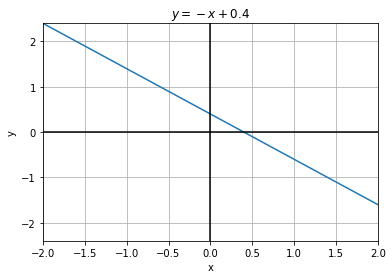

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(-2,2, 100)
y = -x + 0.4
plt.plot(x,y)
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.xlim(-2, 2)
plt.ylim(-2.4, 2.4)
plt.ylabel('y')
plt.xlabel('x')
plt.title('$y=-x+0.4$')
plt.grid()

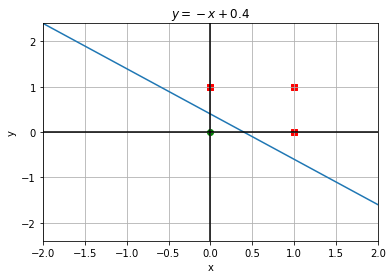

In [ ]:
x = np.linspace(-2,2, 100)
y = -x + 0.4
plt.plot(x,y)
plt.scatter(0,0, marker='o', c='green')
plt.scatter(0,1, marker='s', c='red')
plt.scatter(1,0, marker='s', c='red')
plt.scatter(1,1, marker='s', c='red')
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.xlim(-2, 2)
plt.ylim(-2.4, 2.4)
plt.ylabel('y')
plt.xlabel('x')
plt.title('$y=-x+0.4$')
plt.grid()

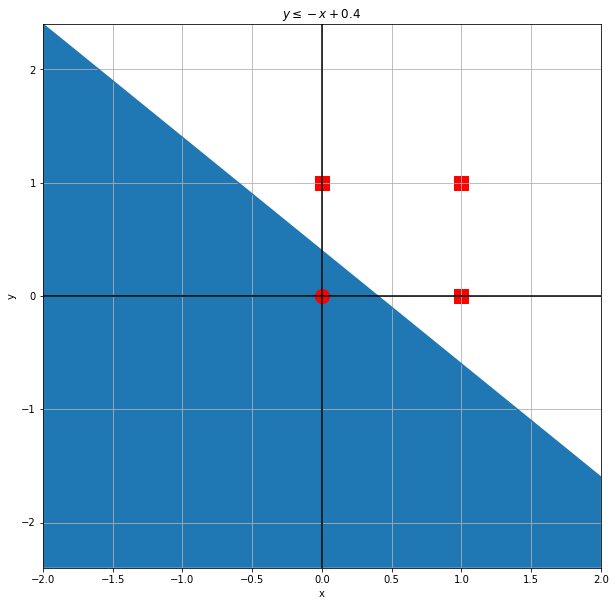

In [ ]:
plt.figure(figsize=(10,10))
markerSize = 200

x = np.linspace(-2,2, 100)
y = -x + 0.4
plt.plot(x,y)

plt.axhline(0,color='black')
plt.axvline(0,color='black')
zz = -2.4*np.ones(len(x))
plt.fill_between(x, y1=y, y2=zz)
plt.xlim(-2, 2)
plt.ylim(-2.4, 2.4)

plt.scatter(0,0, marker='o', c='red', s=markerSize)
plt.scatter(0,1, marker='s', c='red', s=markerSize)
plt.scatter(1,0, marker='s', c='red', s=markerSize)
plt.scatter(1,1, marker='s', c='red', s=markerSize)


plt.ylabel('y')
plt.xlabel('x')
plt.title('$y \leq -x + 0.4$')

plt.grid()
plt.show()

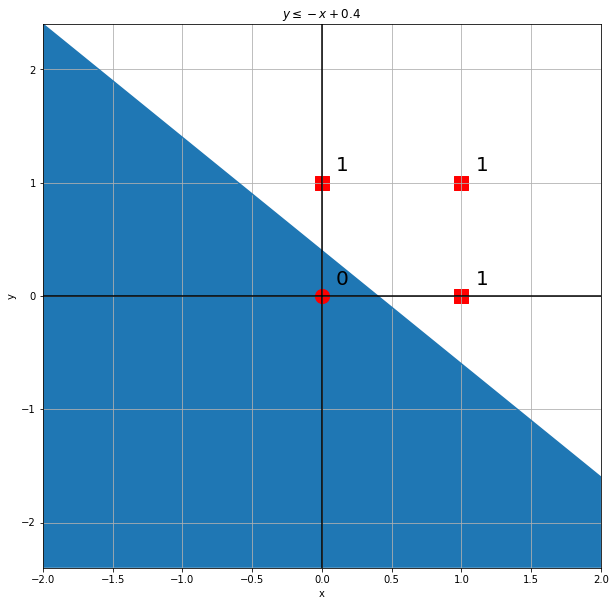

In [ ]:
plt.figure(figsize=(10,10))
markerSize = 200

x = np.linspace(-2,2, 100)
y = -x + 0.4
plt.plot(x,y)

plt.axhline(0,color='black')
plt.axvline(0,color='black')
zz = -2.4*np.ones(len(x))
plt.fill_between(x, y1=y, y2=zz)
plt.xlim(-2, 2)
plt.ylim(-2.4, 2.4)

plt.scatter(0,0, marker='o', c='red', s=markerSize)
plt.scatter(0,1, marker='s', c='red', s=markerSize)
plt.scatter(1,0, marker='s', c='red', s=markerSize)
plt.scatter(1,1, marker='s', c='red', s=markerSize)

plt.text(0+0.1,0+0.1, '0', fontsize=20)
plt.text(0+0.1,1+0.1, '1', fontsize=20)
plt.text(1+0.1,0+0.1, '1', fontsize=20)
plt.text(1+0.1,1+0.1, '1', fontsize=20)

plt.ylabel('y')
plt.xlabel('x')
plt.title('$y \leq -x + 0.4$')

plt.grid()
plt.show()

식(2-6)에서의 변수 치환을 원래의 변수 $x_1$과 $x_2$로 다시 돌리면 아래 그래프는 아래와 같다. 수평 축은 $x_1$이 되고 수직 축은 $x_2$가 된다.

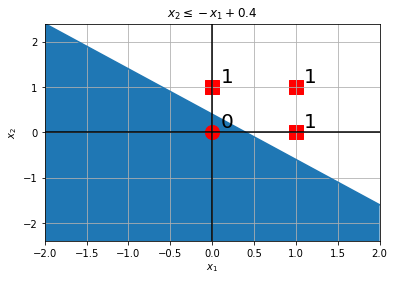

In [ ]:
plt.plot(x,y)

plt.axhline(0,color='black')
plt.axvline(0,color='black')
zz = -2.4*np.ones(len(x))
plt.fill_between(x, y1=y, y2=zz)
plt.xlim(-2, 2)
plt.ylim(-2.4, 2.4)

plt.scatter(0,0, marker='o', c='red', s=markerSize)
plt.scatter(0,1, marker='s', c='red', s=markerSize)
plt.scatter(1,0, marker='s', c='red', s=markerSize)
plt.scatter(1,1, marker='s', c='red', s=markerSize)

plt.text(0+0.1,0+0.1, '0', fontsize=20)
plt.text(0+0.1,1+0.1, '1', fontsize=20)
plt.text(1+0.1,0+0.1, '1', fontsize=20)
plt.text(1+0.1,1+0.1, '1', fontsize=20)

plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.title('$x_2 \leq -x_1 + 0.4$')

plt.grid()
plt.show()

두 입력 변수 ($x_1, x_2$)의 좌표가 파란색 영역에 있을 때 출력 퍼셉트론 출력 $y$는 0이 된다. 

## 2.4 퍼셉트론의 한계
지금까지 살펴본 것처럼 퍼셉트론을 이용하면 AND, NAND, OR의 3가지 논리 회로를 구현할 수 있었습니다. 계속해서 XOR 게이트도 생각해보죠.

### 2.4.1 도전! XOR 게이트
XOR 게이트는 **배터적 논리합**이라는 논리 회로입니다. 표(2-3)과 같이 $x_1$과 $x_2$ 중 한쪽이 1일 때만 1을 출력합니다('배타적'이란 자기 외에는 거부한다는 의미죠). 자, 이 XOR 게이를 퍼셉트론으로 구현하려면 가중치 매개변수 값을 어떻게 설정하면 될까요?

<center>tkd
(표. 2-3) XOR 게이트의 진리표  

|$x_1$|$x_2$|y|  
|---|---|---|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|  

</center>

사실 지금까지 본 퍼셉트론으로는 이 XOR 게이트를 구현할 수 없습니다. 왜 AND와 OR는 되고 XOR은 안될까요? 그림을 그려가며 시각적으로 설명해보겠습니다. 

우선 OR 게이트의 동작을 시각적으로 생각해보죠. OR 게이트는, 예를 들어 가중치 매개 변수 $(b, w_1, w_2)=(-0.5, 1.0, 1.0)$일 때 OR 게이트 진리표인 표(2-3)을 만족합니다. 이때의 퍼셉트론은 식(2-8)로 표현됩니다.  
(식. 2-8)  
<center>
$$ y=
\begin{cases}
0 \;\;\;(-0.5+x_1+x_2 \le 0)\\
1 \;\;\;(-0.5+x_1+x_2 > 0)
\end{cases}$$  
</center>

식(2-8)의 퍼셉트론은 직선으로 나뉜 두 영역을 만듭니다. 직선으로 나뉜 한쪽 영역은 1을 출력하고 다른 한쪽은 0을 출력합니다. 이것을 그림으로 표현해 보겠습니다.


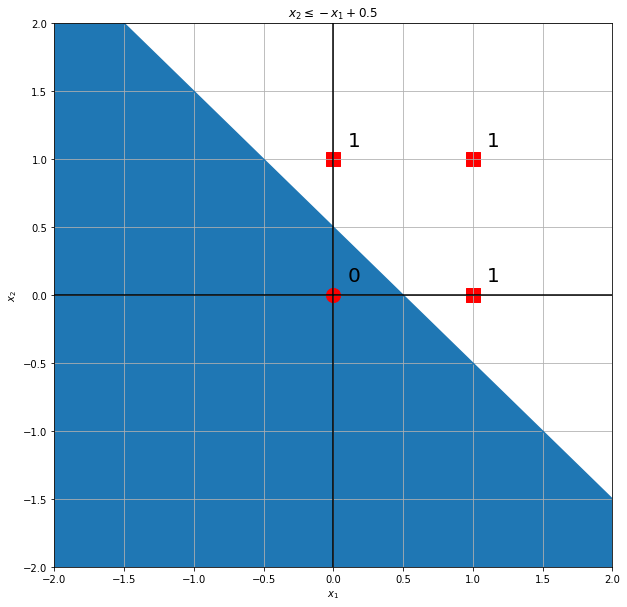

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(-2,2, 100)
x2 = -x1 + 0.5

plt.figure(figsize=(10,10))
plt.plot(x1,x2)

plt.axhline(0,color='black')
plt.axvline(0,color='black')
zz = -2.4*np.ones(len(x1))
plt.fill_between(x1, y1=x2, y2=zz)
plt.xlim(-2, 2)
plt.ylim(-2, 2)


markerSize = 200

plt.scatter(0,0, marker='o', c='red', s=markerSize)
plt.scatter(0,1, marker='s', c='red', s=markerSize)
plt.scatter(1,0, marker='s', c='red', s=markerSize)
plt.scatter(1,1, marker='s', c='red', s=markerSize)

plt.text(0+0.1,0+0.1, '0', fontsize=20)
plt.text(0+0.1,1+0.1, '1', fontsize=20)
plt.text(1+0.1,0+0.1, '1', fontsize=20)
plt.text(1+0.1,1+0.1, '1', fontsize=20)

plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.title('$x_2 \leq -x_1 + 0.5$')

plt.grid()
plt.show()

두 입력$(x_1, x_2)$이 파란색 영역에 위치하면 출력($y$)은 0이되고 파란색 영역 밖에 위치하면 출력($y$)은 1이됩니다. OR 게이트는 $(x_1, x_2)=(0,0)$일 때 0을 출력하고 $(0,1), (1,0), (1,1)$일 때는 1을 출력합니다. 그림에서 원(o)은 0을 의미하며 그림에서 사각형은 1을 의미합니다. OR 게이트를 만들려면 위 그림에서 원(o)과 사각형을 직선으로 나눠야 합니다. 실제로 이 글의 직선은 네 점을 OR 게이트 출력에 맞도록 영역을 나누고 있습니다. 

[과제(課題)]  
AND 게이트에 해당하는 페셉트론을 하나 정의하고 출력이 0이 되는 부분과 출력이 1이 되는 부분을 직선으로 나눈 그림을 그리시오.

XOR 게이트의 경우 출력이 0이 되는 영역과 출력이 1이 되는 영역을 직선으로 나눌 수 있을까요? 즉 앞서 봤던 식(2-3)과 같은 구조의 퍼셉트론으로 출력이 0인 영역가 1인 영역을 구분할 수 있을까요? 결국 식(2-3)의 구조는 하나의 직선입니다. 하나의 직선으로 출력이 0인 영역과 출력이 1인 영역을 나눌 수 있을까요?

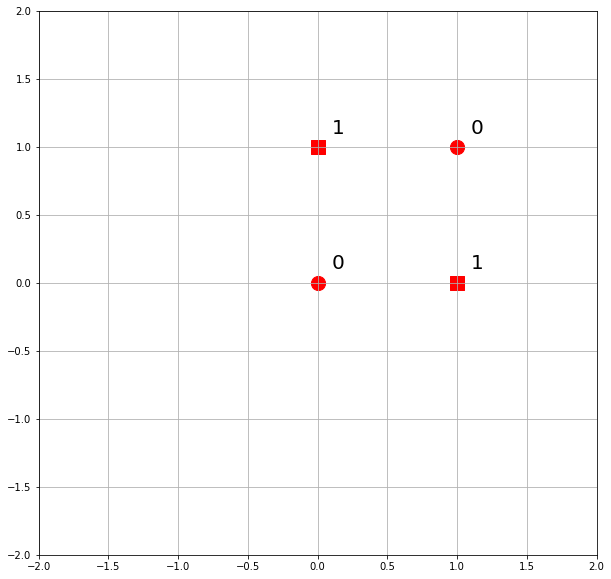

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
markerSize = 200
plt.figure(figsize=(10,10))
plt.scatter(0,0, marker='o', c='red', s=markerSize)
plt.scatter(0,1, marker='s', c='red', s=markerSize)
plt.scatter(1,0, marker='s', c='red', s=markerSize)
plt.scatter(1,1, marker='o', c='red', s=markerSize)

plt.text(0+0.1,0+0.1, '0', fontsize=20)
plt.text(0+0.1,1+0.1, '1', fontsize=20)
plt.text(1+0.1,0+0.1, '1', fontsize=20)
plt.text(1+0.1,1+0.1, '0', fontsize=20)

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid()
plt.show()

### 2.4.2 선형과 비선형
직선 하나로는 출력이 0인 영역과 출력이 1인 영역을 나눌 수 없습니다. 하지만 '직선'이 아니라면 아래 그림처럼 출력이 1인 영역과 0인 영역을 나눌 수 있습니다.  
앞서 봤던 식(2-3) 형태의 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있습니다. 그림처럼 곡선은 표현할 수 없다는 것입니다. 

<img src="https://drive.google.com/uc?id=1aN7yodr_PG4ko2iVrxBoKSzqa1jrldYK">  


위 그림에서 원(o)은 0을 삼각형은 1을 나타내고 있습니다. 그림과 같이 곡선의 영역을 **비선형** 영역이라고 하고 직선의 영역을 **선형** 영역이라고 합니다. 

## 2.5 다층 퍼셉트론
식(2-3)과 같은 단일 퍼셉트론으로는 XOR 게이트를 표현할 수 없습니다. 그렇다고 XOR를 표현할 방법이 없는 것은 아닙니다. 사실 퍼셉트론의 아름다움은 '층을 쌓아'서 다층 퍼셉트론<sup>multi-layer perceptron</sup>을 만들 수 있다는데 있습니다. 이번 절에서는 퍼세트론을 2 중으로 층(layer)을 쌓아서 XOR 게이트를 표현해 볼 것입니다. '층을 쌓는다'는 말 뜯은 잠시 뒤에 살펴보기로 하고 우선 XOR 게이트의 동작을 다른 관점에서 생각해보기로 합시다.

### 2.5.1 기존 게이트 조합하기
XOR 게이트를 만드는 방법은 다양합니다. 그중 하나는 앞서 만든 AND, NAND, OR 게이트를 조합하는 것입니다.

<center>
<img src="https://drive.google.com/uc?id=1Ea9_v0mhCqRwOUXuwPQvw5kXx_bS2v-W">
</center>

위 그림에 보인 회로로 XOR로 동작하는지 살펴 보겠습니다.  
<center>
<img src = "https://drive.google.com/uc?id=1X8uFBz1SmhCdGxt_FiG8E1bsEVo_8qEL">
</center>

입력 $x_1, x_2$에 대한 출력 $y$를 보면 입출력 관계는 XOR 동작이다는  것을 확인할 수 있습니다. 

### 2.5.2 XOR 게이트 구현하기
AND, NAND, OR로 구성된 XOR 게이트를 파이썬으로 구현해보겠습니다. 앞서 정의한 AND, NAND, OR를 활용하여 아래와 같이 (쉽게!) 구현할 수 있습니다.



In [ ]:
import numpy as np

def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [ ]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s1)
  return y

In [ ]:
for x in [(0,0), (1,0), (0,1), (1, 1)]:
  y = XOR(x[0], x[1])
  print('(x1, x2) =', x, '=', y)

(x1, x2) = (0, 0) = 1
(x1, x2) = (1, 0) = 1
(x1, x2) = (0, 1) = 1
(x1, x2) = (1, 1) = 0


이로써 XOR 게이트를 완성했습니다. 지금 구현한 XOR를 뉴런을 이용한 퍼셉트론으로 표현하면 아래 그림과 같이 표현할 수 있습니다. 

<center>
<img src="https://drive.google.com/uc?id=1qZ1ycrUa4JY61MQGaB4RQcsbbSXh31ga" width=400 height=280>
</center>

XOR는 위 그림과 같이 다층 구조의 네트워크입니다. (이 책에서는 왼쪽부터 차례로 0층, 1층, 2층이라고 부르겠습니다) 그런데 위 그림가 같은 페셉트론은 지금까지 본 AND, OR 퍼셉트론과 형태가 다릅니다. 실제로 AND, OR가 단층 퍼셉트론인데 반해, XOR는 2층 퍼셉트론입니다. 이처럼 층이 여러 개인 퍼셉트론을 **다층 퍼셉트론**이라고 합니다. 

위 그림과 같은 2층 퍼셉트론에서는 0층에서 1층으로 신호가 전달되고 이어서 1층에서 2층으로 신호가 전달됩니다. 이 동작을 더 자세히 설명하면 다음과 같습니다.

1. 0층의 두 뉴런이 입력 신호를 받아 1층의 뉴런으로 신호를 보냅니다.
2. 1층의 뉴런이 2층의 뉴런으로 신호를 보내고 2층의 뉴런은 $y$를 출력합니다.

**(위 1, 2 표현은 번역서의 내용을 그래도 옮기 것인데, 번역이 잘 못되었거나 ... 아무튼 설명이 이상함. 그래서 아래와 같이 ... 이해하기로 했음)**

1. 0층 (뉴런의 출력을 각각) $x_1, x_2$이라고 표현했는데, 이는 1층 뉴런의 입력이 된다.
2. 1층 뉴런의 출력을 각각 $s_1, s_2$라고 표현했는데, 이는 2층 뉴런의 입력이되며 2층 뉴런은 $y$를 출력하다.

2층 퍼셉트론의 동작을 공장의 조립아인에 비유할 수 있습니다. 1층 작업자는 흘러오는 '부품'ㅇㄹ 다믕어 일이 완료되면 2층 작업자에게 건네줍니다. 2층 작업자는 1층 작업로부터 전달 받은 '부품'을 다음어 와성품으로 만들어 출력합니다. 이 처러 XOR 게이트 퍼셉트론에서는 작어바들 아이에서 **부품을 전달**하는 일이 이뤄집니다. 

이상으로 2층 구조를 사용해 퍼셉트론으로 XOR 게이트를 구현할 수 있게 되었습니다. 다시 말해 **단층 퍼셉트론으로는 표현하지 못한 것을 층을 하나 늘려 구현**하루 수 있었습니다. 이처럼 피셉트론은 층을 쌓아(깊게 하여) 더 다양한 것을 표현할 수 있습니다.  


# Chapter 3 신경망
## 3.1 퍼셉트론에서 신경망으로
### 3.1.1 신경망의 예
신경망의 개략적인 구조를 그림으로 나타내면 아래와 같습니다. 첫번째 층을 "입력층" 그리고 마지막 층을 "출력층" 그리고 가운데 있는 층을 "은닉층"이라고 합니다. 은닉층의 뉴런은 입력층이나 출력층과 달리 은유적인 표현으로 **사람 눈에는 보이지 않습니다.**. 그래서 '은닉'인 것이죠. 
<center>
<img src="https://drive.google.com/uc?id=1R4nLEiYhhJpJfDqYfPNxx5qWXGZbozt-">
</center>

### 3.1.2 퍼셉트론 복습
신경망의 신호 전달 방법을 보기 전에 퍼셉트론을 복습하겠습니다. 먼저 그림(3-2)와 같은 구조의 네트워크를 생각해 보겠습니다.  

<br>
<center>
(그림. 3-2) 퍼셉트론 복습<br> 
<img src="https://drive.google.com/uc?id=1VDH2Cglhd6BRKFksc-f89fiduYZeqLHw">
</center>

그림(3-2)는 $x_1$과 $x_2$ 두 신호를 입력 받아 $y$를 출력하는 퍼셉트론닙니다. 이 퍼셉트론을 수식으로 나타내면 식(3-1)과 같습니다.  
(식. 3-1)
$$ y=
\begin{cases}
0 \;\;\;(b+w_1x_1+w_2x_2 \le 0)\\
1 \;\;\;(b+w_1x_1+w_2x_2 > 0)
\end{cases}$$  
  
여기서 $b$는 **편형**을 나타내는 매개변수로 뉴런이 얼마나 쉽게 활성화 되느냐을 제어합니다. 한편, $w_1$과 $w_2$는 각 신호의 가중치를 나타내는 매개변수로 각 신호가 출력에 미치는 영향을 제어합니다. 그런데 그림(3-2)의 네크워크에는 편향 b가 보이지 않습니다. 그림(3-2)에 편향($b$)를 반영한다면 그림(3-3)과 같이 나타낼 수 있습니다. 

<br>
<center>
(그림. 3-3) 편향을 명시한 퍼셉트론 <br>
<img src="https://drive.google.com/uc?id=1zgItDmKAcV43_vLwOlghVJlZDlYmB7l8">
</center>

그림(3-3)에서는 가중치가 $b$이고 입력이 1인 뉴런이 추가 되었습니다. 이 퍼셉트론의 동작은 $x_1, x_2, 1$이라는 3개의 신호가 뉴런에 입력되어 각 신호의 가중치를 곱합 후 (~~합산하여~~) 다음 뉴런에 전달됩니다. 다음 뉴런에서는 이 신호들을 합산하여 그 합이 0을 넘으면 1을 출려하고 그렇지 않으면 0을 출력합니다. 참고로, 편향의 입력 신호는 항상 1이기 때문에 그림에서는 해당 뉴런을 회색으로 채워 다른 뉴런과 구별했습니다. 

식(3-1)을 더 간결한 형태로 다시 작성해보겠습니다. 이를 위해 조건 분기의 동작(0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력)ㄹ 하나의 함수로 표현할 수 있습니다. 이 함수를 $h(x)$라 하면 식(3-1)을 다음과 같이 식(3-2)오 식(3-3)으로 표현할 수 있습니다.  
(식. 3-2)  
$$y = h(b\cdot 1+w_1x_1 + w_2x_2)$$
(식. 3-3)
$$h(x) = 
\begin{cases}
0 \;\;\;(x \le 0)\\
1 \;\;\;(x > 0)
\end{cases}$$  

식(3-2)는 입력 신호의 총합이 $h(x)$라는 함수를 거쳐 변환되어, 그 변호나된 값이 출력 $y$가 됨을 보여주니다. 결과적으로 식(3-1)이 하는 일과 식(3-2)와 식(3-3)이 하는 일을 같습니다. 

### 3.1.3 활성화 함수의 등장
조금 전에 $h(x)$라는 함수가 등장했는데, 이처럼 입력 신호의 총합을 출력 신호($y$)로 변환하는 함수를 일반적으로 활성화 함수<sup>activation function</sup>라고 합니다. '활성화'라는 단어의 뜻이 말하는 것과 같이 활성화 함수는 입력 신호의 총합이 활성화를 어떻게 일으킬지 결정하는 역활을 합니다. (2장의 '2.1 절' 참고) 

그럼 식(3-2)를 다시 써보겠습니다. 식(3-2)는 가중치가 곱해진 입력 신호의 총합을 먼저 계산하고 그 합을 활성화 함수에 입력해 결과($y$)를 구하는 두 단계 과정을 거칩니다. 그래서 식(3-2)는 첫번째 단계인 식(3-4)와 두번째 단계인 식(3-5)로 나눌 수 있습니다. 

(식. 3-4)
$$a = b+w_1x_1 + w_2x_2$$

(식. 3-5)  
$$y=h(a)$$  

식(3-4)는 가중치가 달린 입력 신호와 편향의 총합을 계산하여 변수 $a$에 할당 했습니다. 그리고 식(3-5)는 변수 $a$를 활성화 함수 $h()$에 전달해서 출력 $y$를 생성합니다.

뉴런을 원(o)으로 그려보면 식(3-4)와 식(3-5)는 그림(3-4)처럼 표현할 수 있습니다.

<center>
(그림. 3-4) 활성화 함수의 처리 과정<br>
<img src="https://drive.google.com/uc?id=1KAaEtY9_770KL-fkwt23dCzUuNanJM2u"
</center>

그림(3-4)에서는 기존 뉴런의 원을 키우고 그 안에 활성화 함수의 처리 과정을 명시적으로 그려 넣어습니다. 즉, 가중치 신호를 조합한 결과가 a라는 노드가 되고 활성화 함수 $h()$를 통과하여 $y$라는 노드로 변환되는 과정이 분명하게 나타나 있습니다.이 활성화 함수가 퍼셉트론에서 신경망으로 가기 위한 길잡이랍니다. 



#### [과제(課題)]
과제 1. 식(3-3)에 제시한 활성화 함수 $h(x)$의 그래프를 그리시오.

과제 2. 그림(3-4)과 같은 구조인 단일 퍼셉트론으로 AND 게이트 동작을 하는 코드를 작성하시요. 여기서 활성화 함수 $h(x)$는 식(3-3)과 같습니다.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

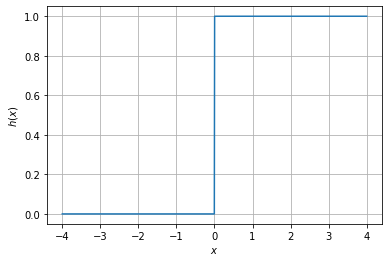

In [ ]:
x = np.linspace(-4,4, 1000)
h = np.zeros(len(x))
index = 0
for ex in x:
  h[index] = ex > 0
  index = index + 1

plt.plot(x, h)
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$h(x)$')
plt.show()

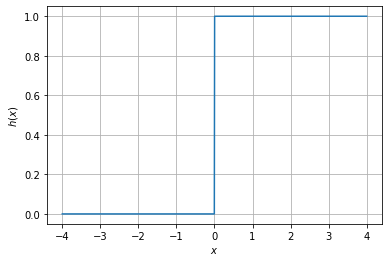

In [ ]:
def step(x):
    return x > 0

h = step(x)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$h(x)$')
plt.show()

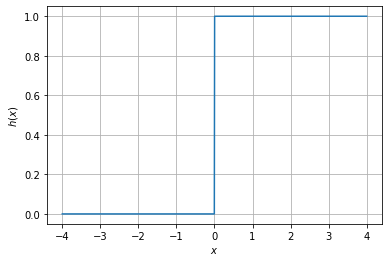

In [ ]:
h = x > 0
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$h(x)$')
plt.show()

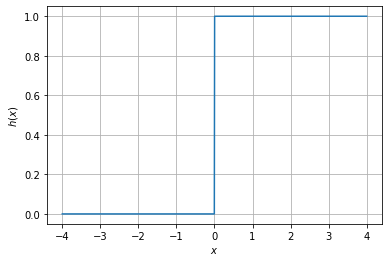

In [ ]:
plt.plot(x, x>0)
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$h(x)$')
plt.show()

In [ ]:
def h(a):
  return a > 0

def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  a = np.sum(w*x) + b
  y = h(a)
  return y

print('0 and 0 :', AND(0,0))
print('0 and 1 :', AND(0,1))
print('1 and 0 :', AND(1,0))
print('1 and 1 :', AND(1,1))

0 and 0 : False
0 and 1 : False
1 and 0 : False
1 and 1 : True


In [ ]:
def h(a):
  return np.array(a > 0, dtype = int)

def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  a = np.sum(w*x) + b
  y = h(a)
  return y

print('0 and 0 :', AND(0,0))
print('0 and 1 :', AND(0,1))
print('1 and 0 :', AND(1,0))
print('1 and 1 :', AND(1,1))

0 and 0 : 0
0 and 1 : 0
1 and 0 : 0
1 and 1 : 1


## 3.2 활성화 함수
 식(3-3)과 같은 활성화 함수는 임계값을 경계로 출력을 바꾸는데(여기서 임계값은 $x = 0$), 이런 함수를 계단 함수<sup>step function</sup>라 합니다. 그래서 활성화 함수로 식(3-3)을 사용했을 때, "퍼셉트론에서 활성화 함수로 계단 함수를 사용했다"라고 말합니다. 다시 말해서, 활성화 함수로 쓸 수 있는 여러 후보 함수 중에서 페셉트론은 활성화 함수로 계단함수를 채택한 것입니다. 그렇다면 계단 함수 이외의 함수를 사용하면 어떻게 될까요? 실은 활성화 함수를 계단 함수에서 다른 함수로 변경하는 것이 신경망의 세계로 나아가는 열쇠입니다! 그럼 바로 신경망에서 이용하는 활성화 함수를 소개하겠습니다. 

### 3.2.1 시그모이드(Sigmoid) 함수
 다음은 신경망에서 자주 이용하는 활성화 함수인 스모이드 함수<sup>sigmoid function</sup>를 나다낸 식입니다.  

(식. 3-6)
$$ h(x) = \frac{1}{1+e^{-x}}$$

여기서 $e$는 자연상수로 2.7182...의 값을 갖는 실수입니다. 식(3-6)로 나타나는 시그모이드 함수는 얼핏 복잡해 보이지만 이 역시 단수한 '함수'일뿐입니다. 함수는 입력값을 전달하면 출력값을 반환하는 변환기죠! 예를 들어 시그모이드 함수에 0.0, 1.0과 2.0을 전달하면 $h(0.0)=1, h(1.0)=0.731..., h(2.0)=0.880...$과 같이 특정 값을 출력합니다. 

 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고 그 변환된 신호를 다음 누런에 전달합니다. 사실 앞 장에서 본 퍼셉트론과 앞으로 볼 신경망의 주된 차이는 이 활성화 함수뿐입니다. 그 외에 뉴런이 어려 층으로 이어지는 구조와 신호를 전달하는 방법은 기본적으로 앞서 살펴본 퍼셉트론과 같습니다. 그러면 활성화 함수로 이용되는 시그모이드 함수를 계단함와 비교하면서 자세히 살펴 보겠습니다.

#### [과제(課題)]
과제 1 - 시그모이드 함수를 그래프로 그리시요.(입력 $x$의 범위는 $-8 \le x \le 8$)  
$$ h(x) = \frac{1}{1+e^{-x}} $$



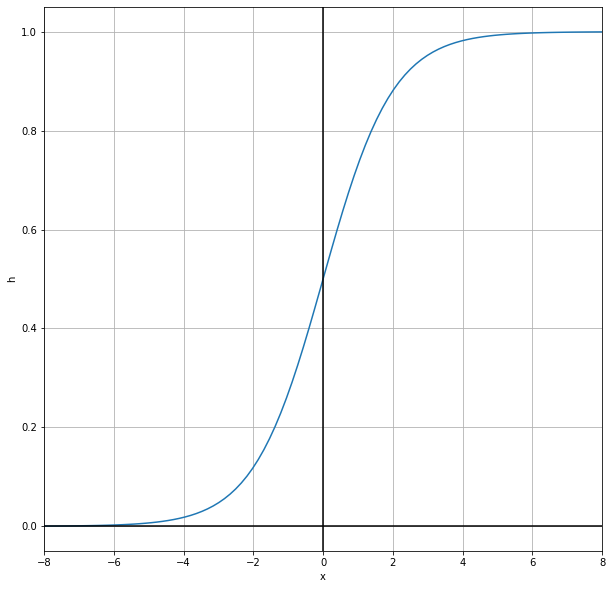

In [ ]:
x = np.linspace(-8, 8, 100)
h = 1 / (1 + np.exp(-x))

plt.figure(figsize=(10,10))
plt.plot(x, h)
plt.xlabel('x')
plt.ylabel('h')
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.xlim(-8, 8)
plt.grid()

### 3.2.2 계단(step) 함수
함수의 형태를 눈으로 확인해보면 그 함수를 이해하는데 큰 도움이 됩니다. 계단 함수는 식(3-3)과 같이 입력이 0을 넘으면 1을 출력하고 그 외의 입력 값에 대해서는 출력이 0인 함수입니다. 계단함수를 파이썬 코드로 또 작성해 보겠습니다.

In [ ]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

이 구현은 단순하고 쉽지만 인수 $x$는 실수만 받아들입니다. 즉, step_function(3.0)은 되지만 넘파이 배열을 인수로 넘길 수는 없습니다. 예를 들어 step_function(np.array([1.0, 2.0]))은 안됩니다. 우리는 앞으로를 위해 넘파이 배열도 지원하도록 수정하고 싶습니다. 그러기 위해서는 다음과 같은 구조를 생각할 수 있습니다.

In [ ]:
def step_function(x):
  y  = x > 0
  return y.astype(np.int32)

[0 1 1]


### 3.2.3 계단 함수의 그래프

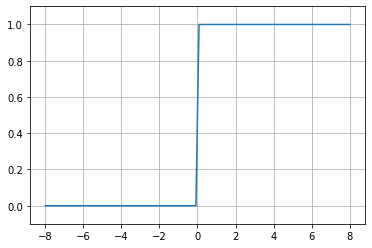

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  return np.array( x > 0, dtype=np.int32)

x = np.linspace(-8, 8, 100)
h = step_function(x)
plt.plot(x,h)
plt.grid()
plt.ylim([-0.1, 1.1])
plt.xlabel('x')
plt.ylabel('h')
plt.show()


왜 식(3-3)의 함수를 계단 함수라고 부르는지 위 그래프를 보면 짐작이 되실 겁니다. 영어 step은 '계단'이라는 뜻이 있습니다.   

[step 뜻 풀이](https://en.dict.naver.com/#/search?query=step&range=all)

### 3.2.4 시그모이드 함수 구현하기
"3.2.1 시그모이드 함수" 절에서 과제로 시그모이드 함수를 그려보았습니다. 다시 한번 더 시그모이드 함수 구현 코드를 살펴 보겠습니다.

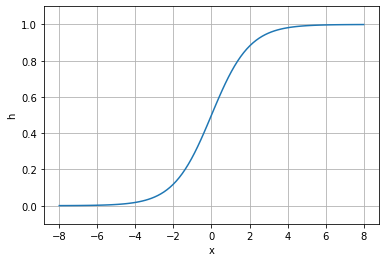

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.linspace(-8, 8, 100)
h = sigmoid(x)
plt.plot(x,h)
plt.grid()
plt.ylim([-0.1, 1.1])
plt.xlabel('x')
plt.ylabel('h')
plt.show()

시그모이드란 'S자 모양'이라는 뜻입니다. 왜 위 함수를 시그모이드 함수라고 부르는지 이해 되시죠?

[sigmoid 뜻 풀이](https://en.dict.naver.com/#/search?query=sigmoid&range=all)

#### [과제] 
과제 1 - 계단 함수와 시그모이드 함수를 한장에 그리시오. 즉, 식(3-3)과 식(3-5)를 한 장에 그리십시요.

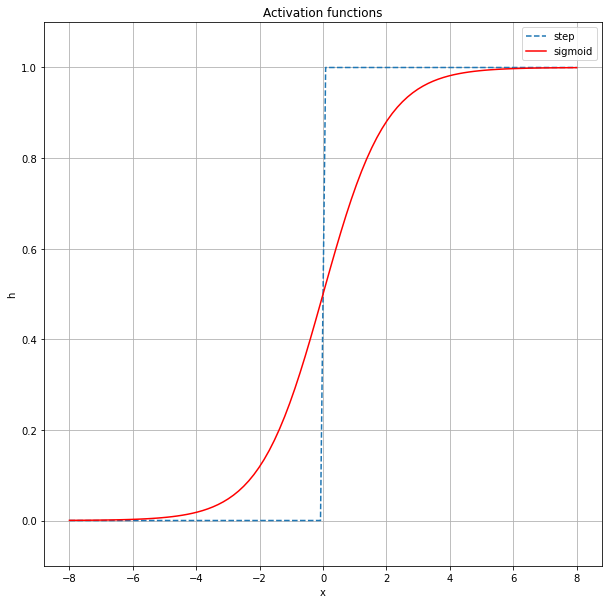

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  return np.array( x > 0, dtype=np.int32)

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.linspace(-8, 8, 100)

h1 = step_function(x)
h2 = sigmoid(x)

plt.figure(figsize=(10,10))

plt.plot(x, h1, '--', label='step')
plt.plot(x, h2, 'r-', label='sigmoid')

plt.grid()
plt.ylim([-0.1, 1.1])
plt.xlabel('x')
plt.ylabel('h')
plt.title('Activation functions')

plt.legend()
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교
시그모이드 함수와 계단 함수를 비교해 봅시다. 위 \[과제\]에서 두 활성화 함수를 한 장에 그렸습니다. 무엇이 다르고 또 공통되는 성질이라고 할 만한 것은 무엇인가요?

두 할성화 함수를 비교하면서 제일 처음 떠오르는 생각은 "매끄럽기"가 다르다고 생각할 것 같습니다. 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화합니다. 반면에 계단 함수는 입력 값 0을 경계로 출력 값이 갑자기 바뀌어버립니다. 시그모이드 함수의 이 매끈함이 신경망 학승베서 아주 중요한 역활을 하게 됩니다. 

(역시 매끄러움과 관련되지만) 계단 함수가 0과 1중 하나의 값만 돌려주는 반면 시그오이드 함수는 실수(0.731..., 0.880... 등)를 돌려준다는 점도 다릅니다. 다시 말해 **(계단 함수를 활성화 함수로 사용하고 있는) 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 전달되었다면 (시그모이드 함수를 활성화 함수로 사용하고 있는) 퍼셉트론에서는 연속적인 실수가 전달됩니다.**  

두 함수의 공통점도 살펴볼까요? 두 함수는 매끄러움이라는 측면에서 다르지만 크게 보면 두 함수는 같은 모양을 하고 있다고 말할 수 있습니다. 두 함수 모두 입력이 매우 작은 경우 출력은 0에 가깝고(혹은 0이고) 입력이 커지면 출력은 1에 가까워지는(혹은 1이 되는) 구조인 것입니다. 


### 3.2.6 비선형 함수
계단 함수와 시그모이드 함수의 공통점은 그 밖에도 있습니다. 중요한 공통점으로, 둘 모두는 비 선형 함수입니다. 시그모이드 함수는 곡선, 계단 함수는 계단처럼 꺽인 직선으로 나타나기 때문에 비선형 함수로 분류됩니다. 

신경망에서는 활성화 함수로 비선형 함수를 사용해야 합니다. 달리 말하면 선형 함수를 사용해서는 안됩니다. 왜 선형 함수는 안 되는 걸까요? 그 이유는 바로 선형 함수를 이용하면 신경암의 층을 깊게 하는 의미가 없어지기 때문입니다. 

선형 함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다는 데 있습니다. 간단한 예를 들어보겠습니다. 선형 함수인 $h(x)=cx$를 활성화 함수로 사용한 3층 네트워크를 떠올려 보세요. 이를 식으로 나타내면 $y(x)=h(h(h(x)))$가 됩니다. 이 계산은 $y(x)=c \cdot c \cdot c \cdot x$처럼 곱셈을 세번 수행했지만 실은 $y(x)=ax$와 같은 형식입니다. $a=c^3$이라고 하면 끝이죠. 즉 은닉층이 없는 네트워크로 표현할 수 있습니다. 이 예처럼 선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없습니다. 그래서 층을 쌓는 것으로부터 이득을 얻고 싶다면 활성화 함수는 반듯이 비선형 함수를 사용해야 합니다. 

### ReLU 함수
지금까지 활성화 함수로서 계단 함수와 시그모이드 함수를 소개했습니다. 시그모이드 함수는 신경망 분야에서 오래전부터 이용해 왔으나, 최근에는 RELU<sup>Recfified Linear Unit, 렐루</sup>함수를 주로 이용합니다.

ReLU는 입력이 0을 넘으면 그 입력을 그대로 사용하고 입력이 0 이하이면 0을 출력하는 함수입니다. ReLU 함수는 식(3-7)로 표현할 수 있습니다. 그리고 그래프로 그려보면 아래와 같습니다.  
(식. 3-7)

$$ h(x) =
\begin{cases}
x \;\;\;(x > 0)\\
0 \;\;\;(x \le 0)
\end{cases}$$


In [ ]:
def relu(x):
  return np.maximum(0, x)

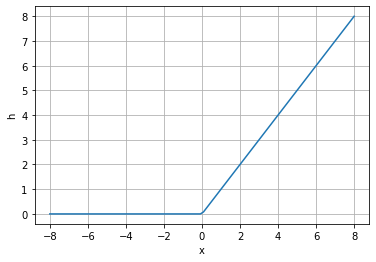

In [ ]:
x = np.linspace(-8, 8, 100)
h = relu(x)
plt.plot(x,h)
plt.grid()
plt.xlabel('x')
plt.ylabel('h')
plt.show()

**길벗 출판사의 모두의 딥러닝, Chapter 7**을 기반으로 설명을 이어 가겠습니다.

***